In [ ]:
!pip install visualkeras

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 993.0/993.0 kB 12.9 MB/s eta 0:00:00


In [ ]:
import numpy as np
import pandas as pd

In [ ]:
# Cargar archivo
df = pd.read_csv('DataABC_CNN.csv')

df

,DataT1,DataT2,DataT3,DataT4,DataT5,DataT6,DataT7,DataT8
0,-3.894613,-7.689887,-2.524532,-5.968930,0.169782,2.016963,-4.105891,0.289317
1,-10.608076,-11.244770,-8.639345,-12.923639,1.411633,2.952605,-2.704683,1.023064
2,10.309138,8.634027,6.757232,1.822571,2.301530,3.092672,-0.503397,1.494483
3,2.948878,1.096499,0.571641,4.390161,2.300157,2.117346,1.694227,1.393796
4,-12.698596,-10.725860,-11.912738,-7.300614,1.380005,0.345342,3.090983,0.739550
...,...,...,...,...,...,...,...,...
710395,9.300338,8.747457,-11.652369,-6.390592,3.527508,2.361270,4.468162,4.507688
710396,12.512947,3.526813,6.556285,16.793777,1.966381,0.564513,3.099912,3.073172
710397,14.529821,18.266376,6.958174,22.131326,0.122617,-1.063354,1.083254,1.010507
710398,-6.643324,-2.932981,-33.482511,-13.776211,-1.504399,-2.651442,-0.573657,-0.696685


In [ ]:
df = df.dropna()

df

,DataT1,DataT2,DataT3,DataT4,DataT5,DataT6,DataT7,DataT8
0,-3.894613,-7.689887,-2.524532,-5.968930,0.169782,2.016963,-4.105891,0.289317
1,-10.608076,-11.244770,-8.639345,-12.923639,1.411633,2.952605,-2.704683,1.023064
2,10.309138,8.634027,6.757232,1.822571,2.301530,3.092672,-0.503397,1.494483
3,2.948878,1.096499,0.571641,4.390161,2.300157,2.117346,1.694227,1.393796
4,-12.698596,-10.725860,-11.912738,-7.300614,1.380005,0.345342,3.090983,0.739550
...,...,...,...,...,...,...,...,...
710395,9.300338,8.747457,-11.652369,-6.390592,3.527508,2.361270,4.468162,4.507688
710396,12.512947,3.526813,6.556285,16.793777,1.966381,0.564513,3.099912,3.073172
710397,14.529821,18.266376,6.958174,22.131326,0.122617,-1.063354,1.083254,1.010507
710398,-6.643324,-2.932981,-33.482511,-13.776211,-1.504399,-2.651442,-0.573657,-0.696685


In [ ]:
A = df.to_numpy()

h, w = A.shape

h

710400

In [ ]:
B = A.reshape(int(h/400),400, 8)
B[0,:,:]

array([[ -3.89461344,  -7.68988687,  -2.52453154, ...,   2.01696269,
         -4.10589077,   0.28931664],
       [-10.60807579, -11.24477045,  -8.63934475, ...,   2.95260536,
         -2.70468273,   1.02306401],
       [ 10.30913808,   8.63402736,   6.75723228, ...,   3.09267225,
         -0.50339708,   1.49448261],
       ...,
       [ -4.75490173, -10.63490819, -19.29620526, ...,  -3.28233395,
          8.2254156 ,  -0.18537106],
       [  6.47438516,   1.67737034,  -4.66032528, ...,  -3.73832356,
          9.58992946,  -0.1710127 ],
       [ 16.4199409 ,   9.35345704,   5.23952699, ...,  -3.86750469,
          8.83429946,  -0.37444457]])

In [ ]:
y = pd.read_csv('EtiquetaABC_CNN.csv')

y

,letter
0,D
1,D
2,D
3,D
4,D
...,...
1771,C
1772,C
1773,C
1774,C


In [ ]:
y['letter'] = [
                       0 if typ == 'D' else 1 if typ == 'I' else 2 for typ in y['letter']
                       ]

y

,letter
0,0
1,0
2,0
3,0
4,0
...,...
1771,2
1772,2
1773,2
1774,2


In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
x = B

# 80 % (entrenamiento) - 20 % (pruebas)
# 42 filas de manera aleatoria
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=64)

In [ ]:
import tensorflow as tf

# Convertir a tensor la salida
y_trainOut = tf.convert_to_tensor(y_train, dtype = tf.int32)
y_testOut = tf.convert_to_tensor(y_test, dtype = tf.int32)
y_trainOut = tf.one_hot(y_trainOut, depth=3)
y_testOut = tf.one_hot(y_testOut, depth=3)

h_y_train, _ = y_train.shape
h_y_test, _ = y_test.shape

y_trainOut = tf.reshape(y_trainOut, [h_y_train ,3])
y_testOut = tf.reshape(y_testOut, [h_y_test ,3])

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout
import visualkeras

# Define the model architecture
model = tf.keras.Sequential([
    layers.Conv2D(8, (3, 3), 1, activation='relu', padding='same', input_shape=(400, 8, 1)),
    layers.MaxPooling2D((2, 2), padding='same'),
    layers.Conv2D(16, (3, 3), 1, activation='relu', padding='same'),
    layers.MaxPooling2D((2, 2), padding='same'),
    layers.Conv2D(32, (3, 3), 1, activation='relu', padding='same'),
    layers.MaxPooling2D((2, 2), padding='same'),
    layers.Conv2D(64, (3, 3), 1, activation='relu', padding='same'),
    layers.MaxPooling2D((2, 2), padding='same'),
    layers.Conv2D(128, (3, 3), 1, activation='relu', padding='same'),
    layers.MaxPooling2D((2, 2), padding='same'),
    layers.Conv2D(256, (3, 3), 1, activation='relu', padding='same'),
    layers.MaxPooling2D((2, 2), padding='same'),
    layers.Flatten(),
    layers.Dense(512, activation='relu'),
    layers.Dense(3, activation='sigmoid')
])

# Compile the model with loss and optimizer functions
model.compile(
    'adam',
    loss=tf.keras.losses.binary_crossentropy,
    # Revisar optimizacion
    metrics=[
        tf.keras.metrics.BinaryAccuracy(name='accuracy'),
        tf.keras.metrics.Precision(name='precision'),
        tf.keras.metrics.Recall(name='recall')
    ]
)



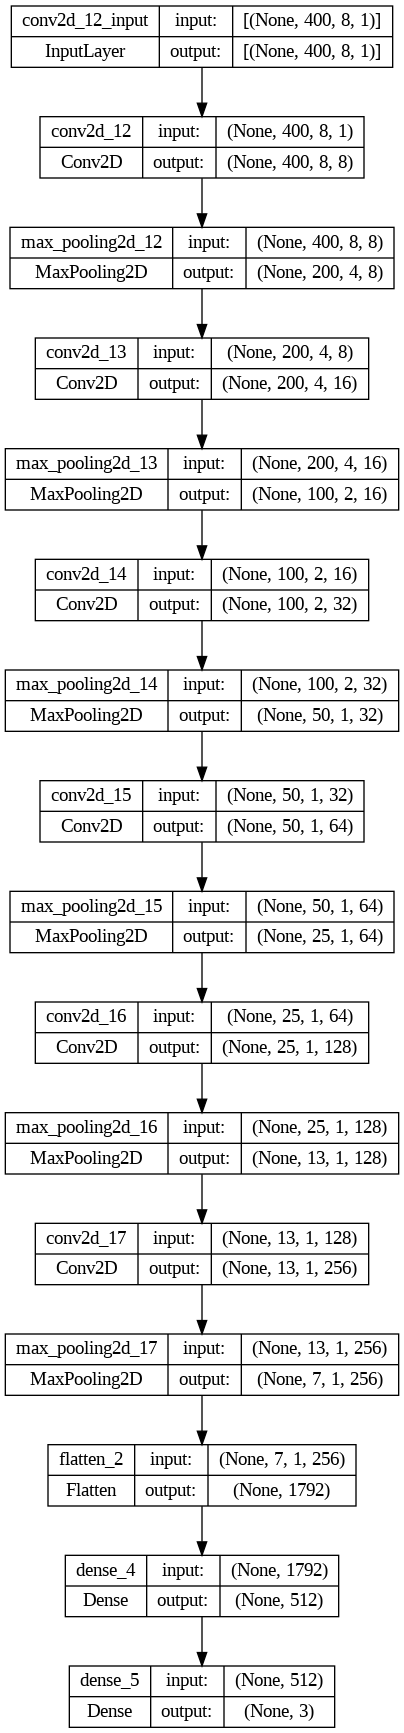

In [ ]:
tf.keras.utils.plot_model(model, to_file="mi_modelo.png", show_shapes=True)

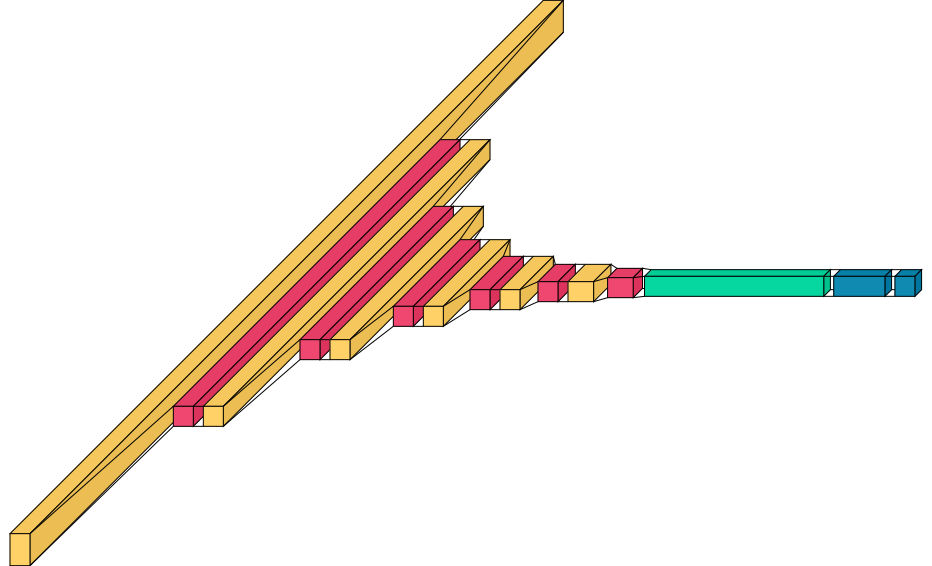

In [ ]:
visualkeras.layered_view(model)

In [ ]:
Nepocas = 30

history = model.fit(x_train, y_trainOut, epochs=Nepocas)

Epoch 1/30
45/45 [==============================] - 8s 126ms/step - loss: 0.5151 - accuracy: 0.7768 - precision: 0.7656 - recall: 0.4761
Epoch 2/30
45/45 [==============================] - 7s 160ms/step - loss: 0.3337 - accuracy: 0.8430 - precision: 0.8153 - recall: 0.6838
Epoch 3/30
45/45 [==============================] - 6s 128ms/step - loss: 0.2611 - accuracy: 0.8859 - precision: 0.8549 - recall: 0.7923
Epoch 4/30
45/45 [==============================] - 7s 157ms/step - loss: 0.2145 - accuracy: 0.8988 - precision: 0.8607 - recall: 0.8310
Epoch 5/30
45/45 [==============================] - 6s 126ms/step - loss: 0.1986 - accuracy: 0.9136 - precision: 0.8806 - recall: 0.8570
Epoch 6/30
45/45 [==============================] - 7s 158ms/step - loss: 0.1714 - accuracy: 0.9249 - precision: 0.8923 - recall: 0.8810
Epoch 7/30
45/45 [==============================] - 6s 125ms/step - loss: 0.1495 - accuracy: 0.9357 - precision: 0.9087 - recall: 0.8972
Epoch 8/30
45/45 [=======================

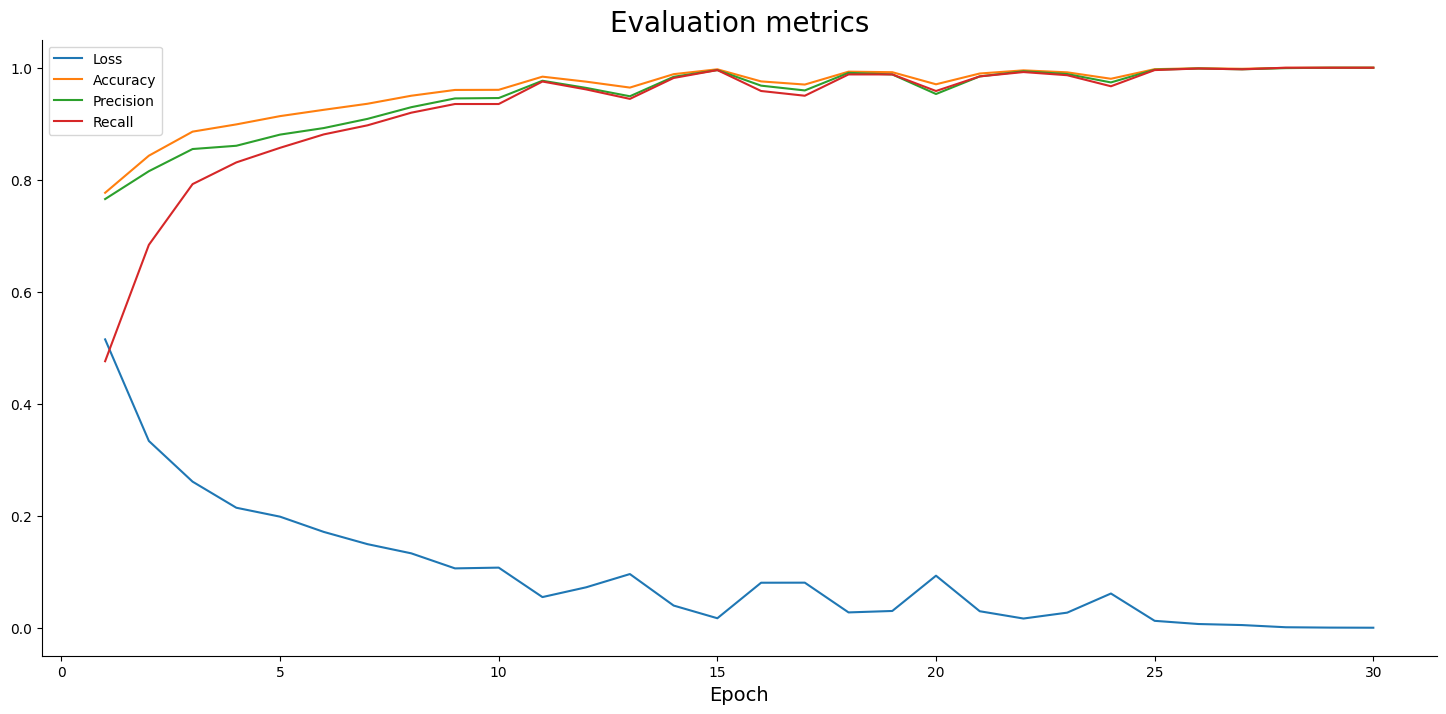

In [ ]:
import matplotlib.pyplot as plt
from matplotlib import rcParams

rcParams['figure.figsize'] = (18, 8)
rcParams['axes.spines.top'] = False
rcParams['axes.spines.right'] = False

plt.plot(
    np.arange(1, Nepocas+1), 
    history.history['loss'], label='Loss'
)
plt.plot(
    np.arange(1, Nepocas+1), 
    history.history['accuracy'], label='Accuracy'
)
plt.plot(
    np.arange(1, Nepocas+1), 
    history.history['precision'], label='Precision'
)
plt.plot(
    np.arange(1, Nepocas+1), 
    history.history['recall'], label='Recall'
)
plt.title('Evaluation metrics', size=20)
plt.xlabel('Epoch', size=14)
plt.legend();

In [ ]:
# Evaluate the model on the test data using `evaluate`
print("Evaluate on test data")
results = model.evaluate(x_test, y_testOut, batch_size=64)
print("test loss, test acc:", results)

# Generate predictions (probabilities -- the output of the last layer)
# on new data using `predict`
print("Generate predictions")
predictions = model.predict(x_test)
print("predictions shape:", predictions.shape)

Evaluate on test data
6/6 [==============================] - 1s 61ms/step - loss: 0.5649 - accuracy: 0.9223 - precision: 0.8957 - recall: 0.8680
test loss, test acc: [0.5649291276931763, 0.9222846627235413, 0.895652174949646, 0.867977499961853]
Generate predictions
12/12 [==============================] - 1s 32ms/step
predictions shape: (356, 3)


In [ ]:
# Vector de predicciones
predictions = np.round(predictions,0)
y_predic=[]

for i in range (len(predictions)):
  if predictions[i].tolist()==[1,0,0]:
    y_predic.append(0)
  elif predictions[i].tolist()==[0,1,0]:
    y_predic.append(1)
  else:
    y_predic.append(2)

# Vector de respuestas reales
y_true = y_test.values.tolist()

# Matriz de comfusión
from sklearn.metrics import confusion_matrix

confusion_matrix(y_true, y_predic, labels=[0,1,2])

array([[ 62,  15,   9],
       [ 15,  62,   3],
       [  1,   0, 189]])

In [ ]:
model.save("ABC_CNN.h5")